# Week 4: Intro to Statistics and Probability

In [1]:
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3, venn2_circles, venn3_circles
import scipy.stats as stats
import random

## Day 3: Intro to Probability (2)
### Bayes' Theorem
* The Bayes' Theorem is a result in probability theory which relates the conditinal probabilities of two events, $A$ and $B$. It is a simple and powerful tool that allows us to *reverse the conditioning* in a conditional probability calculations. In short, it says that the relation between $P(A \mid B)$ and $P(B \mid A)$ is given by
\begin{equation} P(A \mid B) = \frac{P(B \mid A) \cdot P(A)}{P(B)} \end{equation}
This result extends beyond simple probabilities and is heavily exploited in classification methods in machine learning (and not just there)

We will demonstrate its application on through examples.

### Example 1
* It is estimated that 4% of people who spend time in the woods will get Lyme disease. Of people with Lyme disease, the test to determine if you have it is will give a positive reading 97% of the time. Of people who do not have Lyme disease, the same test will give a negative rating 92% of the time. Find the probability that a **person really has Lyme disease, given that they test positive**.

P(+) = 0.1104
P(L|+) = 0.3170289855072464


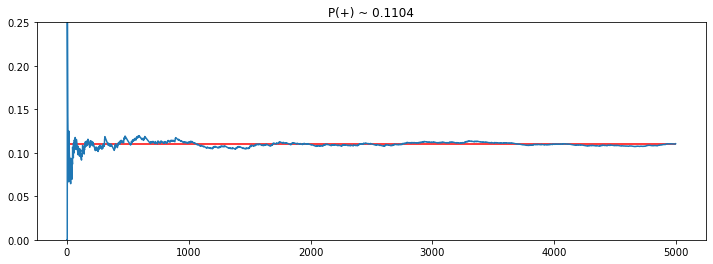

In [14]:
# We will perform a simulation

n = 5000 # simulations

positive = np.zeros(n) #here we store the positive tests
freq = np.zeros(n) #here we store the frequencies
has_lyme_and_tests_positive = 0

for i in range(n):
    has_lyme = np.random.random()
    tests_positive = np.random.random()
    
    #decide if person has lyme
    if has_lyme <= 0.04:
        #person is sick
        #check if the person tests positive
        if tests_positive <= 0.97:
            #person is sick and tests positive
            positive[i] = 1
            has_lyme_and_tests_positive += 1
        
    else:
        #person is not sick
        #check if the person tests positive
        if tests_positive <= 0.08:
            positive[i] = 1
    
    #update frequency
    freq[i] = np.sum(positive[:(i+1)])/(i+1)
    
print('P(+) =', sum(positive)/n) #alternatively use freq[-1]
print('P(L|+) =', has_lyme_and_tests_positive/sum(positive))

plt.figure(figsize=(12, 4))
plt.hlines(0.11, 0, n, color='r')
plt.ylim(0, 0.25)
plt.title(f'P(+) ~ {freq[-1]}')
plt.plot(freq)
plt.show()

### Example 2
Tom has three ways of getting to work. 30% of the time he travels by car, 20% of the time he rides his bicycle and 50% of the time he walks.

* When travelling by car, Tom is late 5% of the time.
* When riding his bicycle he is late 10% of the time.
* When walking he is late 25% of the time.

Given that he was on time one day, find the probability that he got to work riding his bicycle.

P(on time) = 0.8426
P(on time by bike) = 0.21671018276762402


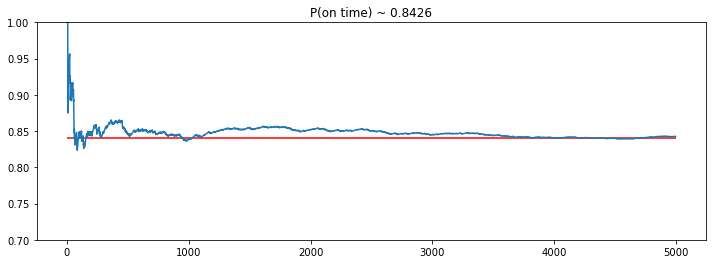

In [22]:
n = 5000

on_time = np.zeros(n)
freq = np.zeros(n)
rode_bike_and_was_on_time = 0

for i in range(n):
    transport = np.random.random()
    is_on_time = np.random.random()
    
    #how he travels
    
    if transport <= 0.3:
        #travels by car
        if is_on_time >= 0.05:
            #on time
            on_time[i] = 1
        
    elif transport <= 0.5:
        #travels by bike
        if is_on_time >= 0.1:
            on_time[i] = 1
            rode_bike_and_was_on_time += 1
        
    else:
        #walks
        if is_on_time >= 0.25:
            on_time[i] = 1
            
    freq[i] = np.sum(on_time[:(i+1)])/(i+1)

print('P(on time) =', sum(on_time)/n) #alternatively use freq[-1]
print('P(on time by bike) =', rode_bike_and_was_on_time/sum(on_time))

plt.figure(figsize=(12, 4))
plt.hlines(0.84, 0, n, color='r')
plt.ylim(0.7, 1)
plt.title(f'P(on time) ~ {freq[-1]}')
plt.plot(freq)
plt.show()